<a href="https://colab.research.google.com/github/soreloserrr/cs102/blob/master/homework06/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

In [4]:
# PUT YOUR CODE HERE
import pandas as pd
import random

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)


data.drop_duplicates(inplace=True)

empty_artist_name = data[data['artist_name'] == 'empty_field']
print("Количество строк с пустым artist_name:", len(empty_artist_name))
print(empty_artist_name)

data = data[data['artist_name'] != 'empty_field']


Количество строк с пустым artist_name: 1028
       instance_id  artist_name  \
30877      82231.0  empty_field   
17110      58397.0  empty_field   
44186      56237.0  empty_field   
28608      59149.0  empty_field   
35193      38147.0  empty_field   
...            ...          ...   
5762       54075.0  empty_field   
6795       22138.0  empty_field   
47360      70181.0  empty_field   
45560      24758.0  empty_field   
42866      33959.0  empty_field   

                                              track_name  popularity  \
30877                              My Ding-A-Ling - Live        37.0   
17110                Glitter Freeze (feat. Mark E Smith)        47.0   
44186  Piano Quartet No. 1 in G Minor, K. 478: III. R...        24.0   
28608                                               Huey        56.0   
35193                                          Bad Vibes        63.0   
...                                                  ...         ...   
5762                           

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Количество треков по жанрам:
 Jazz           0.102805
Anime          0.101750
Blues          0.101276
Hip-Hop        0.100590
Classical      0.100274
Electronic     0.099747
Country        0.099694
Rock           0.099167
Rap            0.098007
Alternative    0.096689
Name: music_genre, dtype: float64


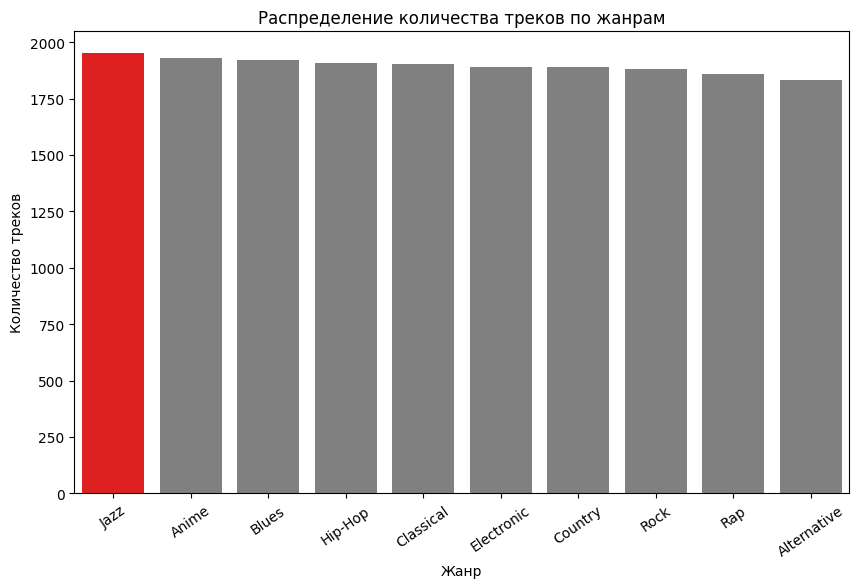

Самый танцевальный жанр: Hip-Hop

             major  minor predominant_key
music_genre                              
Alternative   1144    690           major
Anime         1174    756           major
Blues         1344    577           major
Classical     1256    646           major
Country       1662    229           major
Electronic    1009    883           major
Hip-Hop       1050    858           major
Jazz          1033    917           major
Rap           1070    789           major
Rock          1374    507           major


In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]

#1
genre_counts = data['music_genre'].value_counts(normalize=True)
print("Количество треков по жанрам:\n", genre_counts)

#2
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
genre_counts = data['music_genre'].value_counts()
colors = ['gray']*len(genre_counts.index)
max_genre = genre_counts.idxmax()
colors[list(genre_counts.index).index(max_genre)] = 'red'
sns.countplot(x='music_genre', data=data, order=genre_counts.index, palette=colors)
plt.xticks(rotation=35)
plt.title('Распределение количества треков по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество треков')

plt.show()


#3
genre_danceability = data.groupby('music_genre')['danceability'].mean()
most_danceable_genre = genre_danceability.sort_values(ascending=False).index[0]

print(f"Самый танцевальный жанр: {most_danceable_genre}\n")

#4
ct = pd.crosstab(index=data['music_genre'], columns=data['mode'])
ct['predominant_key'] = ct.apply(lambda row: 'major' if row['Major'] > row['Minor'] else 'minor', axis=1)
ct = ct[['Major', 'Minor', 'predominant_key']]
ct.columns = ['major', 'minor', 'predominant_key']

print(ct)


Тональность major является преобладающей во всех жанрах

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Исполнитель с наибольшим количеством треков: Nobuo Uematsu
Исполнитель с наименьшим количеством треков: Himalayas


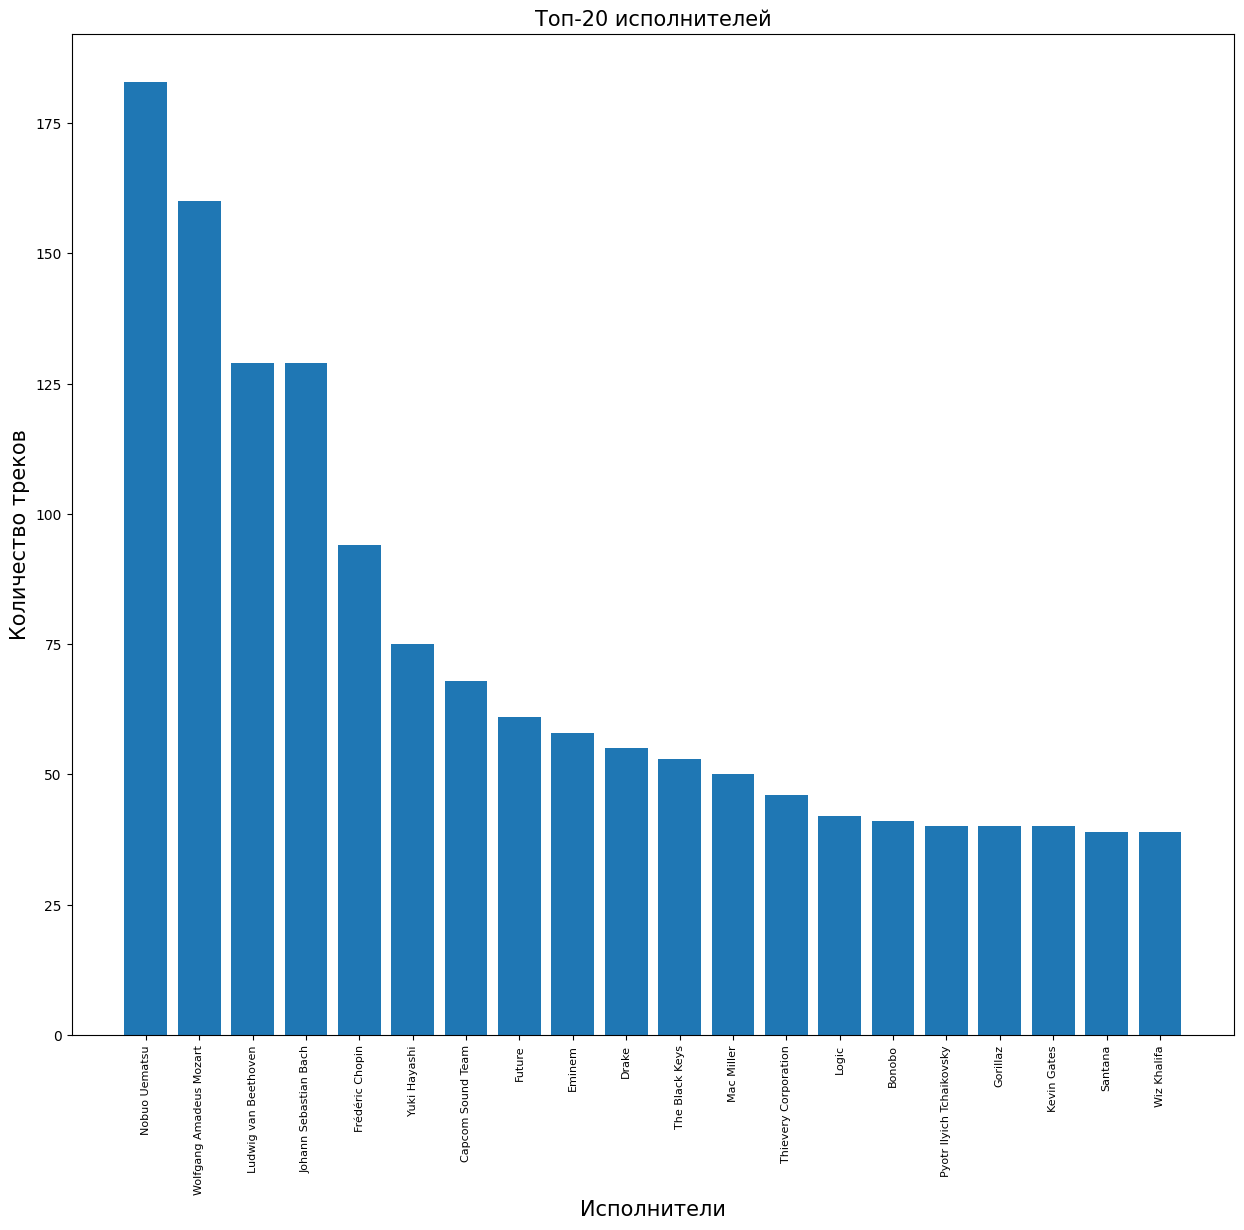

In [5]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import matplotlib.pyplot as plt

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]

#1
most_popular_musician = data['artist_name'].value_counts().idxmax()
print(f"Исполнитель с наибольшим количеством треков: {most_popular_musician}")

least_popular_artist = data['artist_name'].value_counts().idxmin()
print(f"Исполнитель с наименьшим количеством треков: {least_popular_artist}")

#2
top_20_musicians = data['artist_name'].value_counts().head(20)

fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(1, 1, 1)
plt.bar(top_20_musicians.index, top_20_musicians.values)
plt.xticks(rotation=90, size=8)
plt.xlabel('Исполнители', size=15)
plt.ylabel('Количество треков', size=15)
plt.title('Топ-20 исполнителей', size=15)

plt.show()


Вывод: из горизонтальной столбиковой диаграммы видно, что исполнителем, имеющим наибольшее количесвтво треков, является Nobuo Uematsu. Их у него более 175 штук.
На последнем месте среди топ-20 исполнителей находится Wiz Khalifa, у которого насчитывается порядка 40 треков.

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

<ipython-input-7-7b5935305b66>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]].corr()


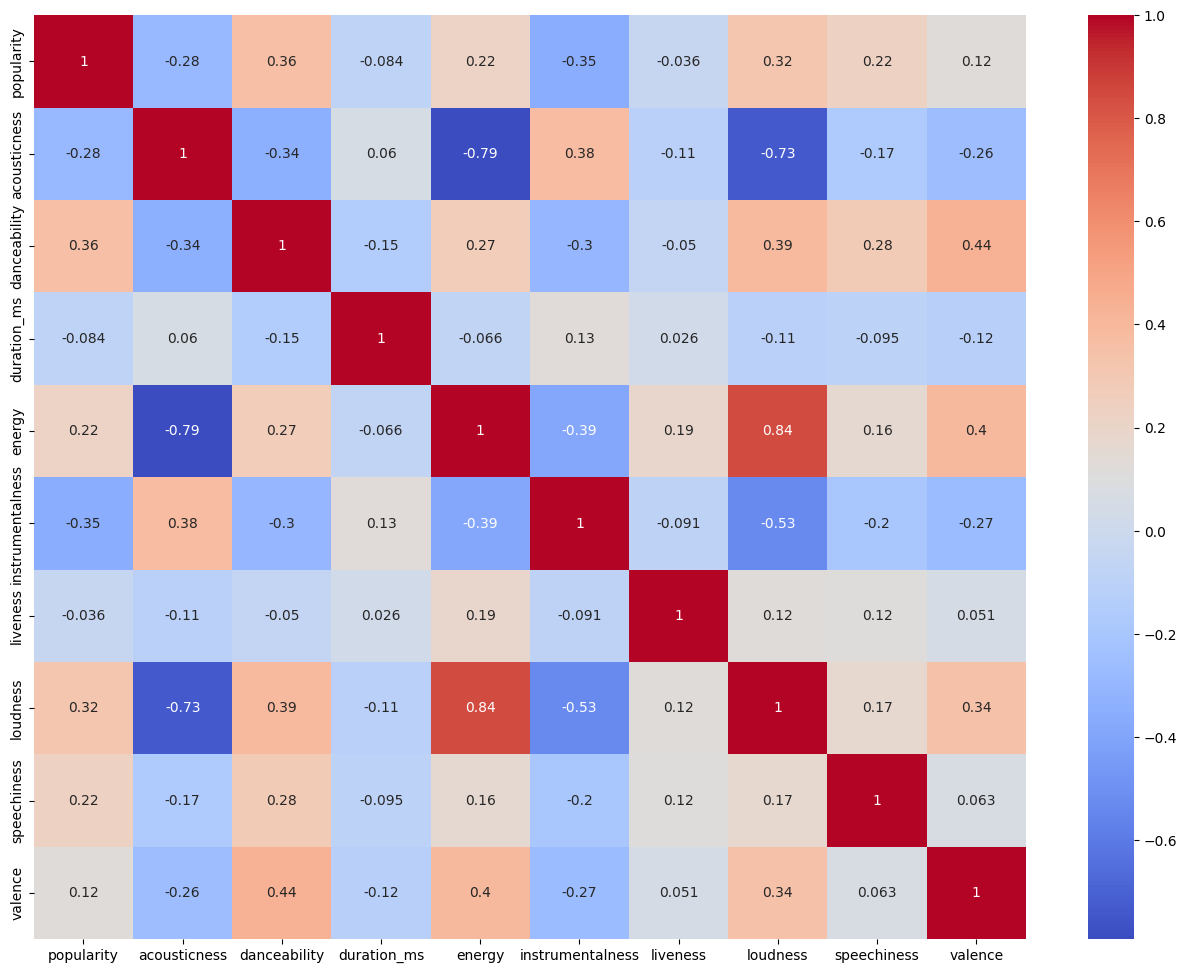

Корреляция между популярностью (popularity) и длиной названия трека:  -0.22367119009824663


In [7]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]


#1
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(1, 1, 1)
corr_matrix = data[["popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

#2
data["track_name_length"] = data["track_name"].apply(lambda x: len(str(x)))

cor = data["popularity"].corr(data["track_name_length"])

print("Корреляция между популярностью (popularity) и длиной названия трека: ", cor)



Сильная корреляция между следующими характеристиками: energy и loudness (0.84);


Слабая корреляция между следующими характеристиками:acousticness и energy (-0.79), acousticness и loudness (-0.73); 

Характеристики, между которыми корреляции практически нет: acousticness и duration_ms (0.058), danceability и liveness (-0.052),duration_ms и energy (-0.062), liveness и valence (0.05), speechiness и valence (0.061)

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

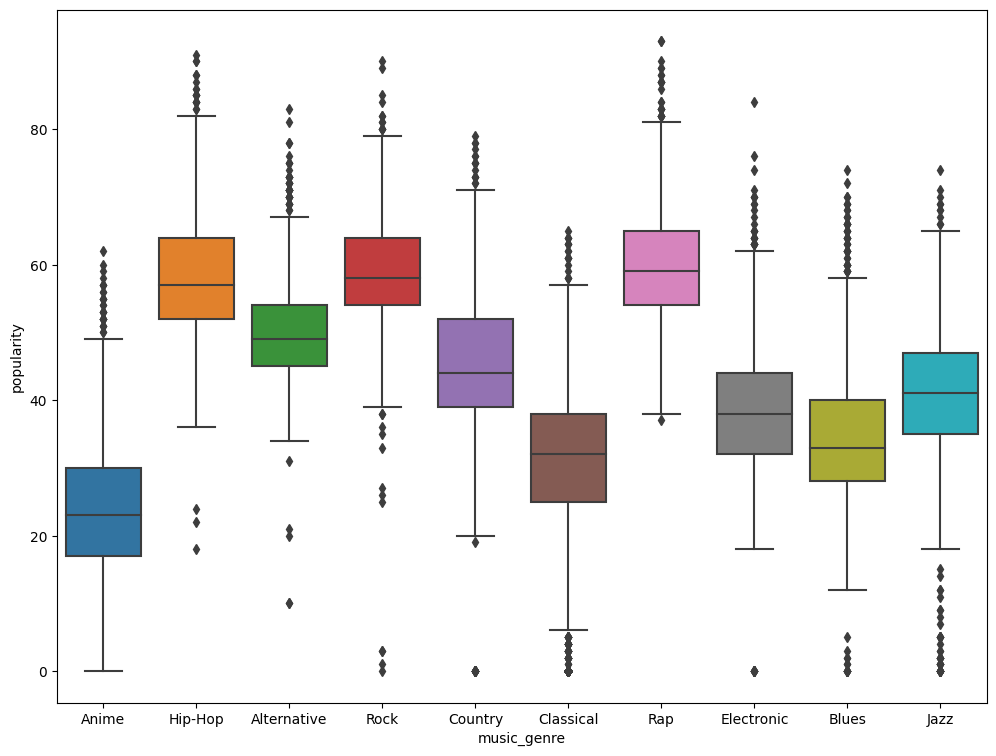

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='music_genre', y='popularity', data=data)

plt.show()


Жанры, которые похожи между собой: Hip-Hop, Rock, Rap; Blues и Classical; Electronic и Jazz

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

In [17]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import plotly.express as px


random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]


top_genres = data.groupby('music_genre')['popularity'].sum().nlargest(3).index.tolist()

filtered_data = data.loc[data.groupby('music_genre')['popularity'].idxmax()]

new_filtered_data = filtered_data[filtered_data['music_genre'].isin(top_genres)]

data_about_artist = new_filtered_data.groupby(['music_genre', 'artist_name'])['popularity'].sum().reset_index()

data_about_artist['percentage'] = data_about_artist['popularity'] / data_about_artist['popularity'].sum() * 100
data_about_artist['percentage'] = data_about_artist['percentage'].round(2)

fig = px.sunburst(data_about_artist, path=['music_genre', 'artist_name'], values='popularity', hover_data=['percentage'], color='music_genre')
fig.update_traces(textinfo='label+percent parent')
fig.show()


### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

<ipython-input-28-99de0037ea08>:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-28-99de0037ea08>:15: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



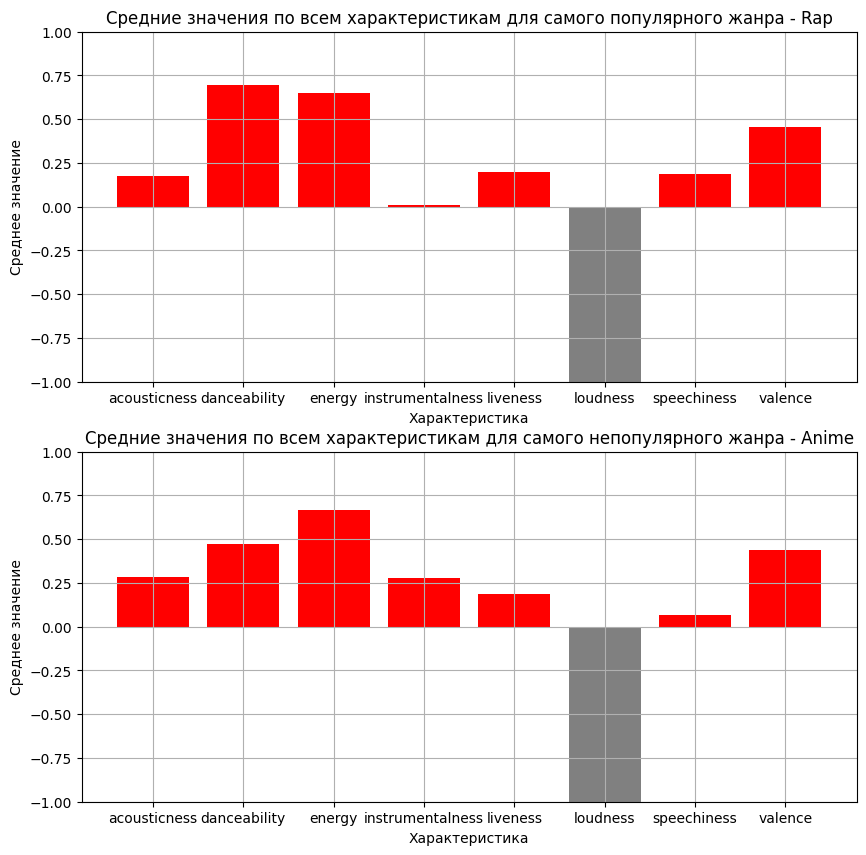

In [28]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]


popular_genres = data.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).head(1)
unpopular_genres = data.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).tail(1)

parameters = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))


most_popular_means = popular_genres[parameters].values.tolist()[0]
most_unpopular_means = unpopular_genres[parameters].values.tolist()[0]


colors_most_popular = ['grey' if x < 0 else 'red' for x in most_popular_means]
axes[0].bar(parameters, popular_means, color=colors_most_popular)
axes[0].set_title(f"Средние значения по всем характеристикам для самого популярного жанра - {popular_genres.index[0]}")
axes[0].set_ylim([-1, 1])

colors_most_unpopular = ['grey' if x < 0 else 'red' for x in unpopular_means]
axes[1].bar(parameters, most_unpopular_means, color=colors_most_unpopular)
axes[1].set_title(f"Средние значения по всем характеристикам для самого непопулярного жанра - {unpopular_genres.index[0]}")
axes[1].set_ylim([-1, 1])


for ax in axes.flat:
    ax.set(xlabel='Характеристика', ylabel='Среднее значение')
    ax.grid()

plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

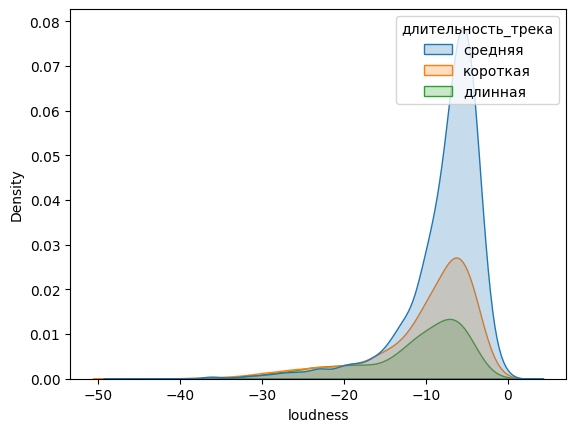

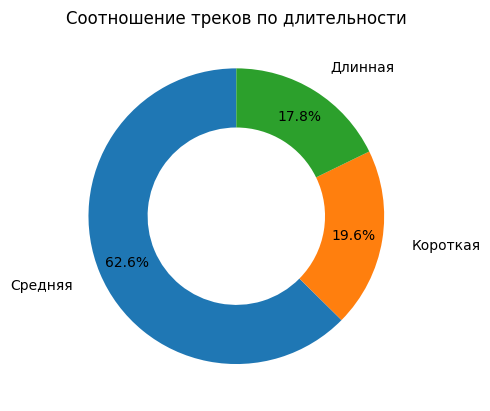

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(13)

data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=13)
data = data.drop_duplicates()
data = data[(data.artist_name != 'empty_field')]


#1
def duration_division(duration):
    if duration <= 3 * 60 * 1000:
        return 'короткая'
    elif duration <= 5 * 60 * 1000:
        return 'средняя'
    else:
        return 'длинная'

data['длительность_трека'] = data['duration_ms'].apply(duration_division)


#2
sns.kdeplot(data=data, x='loudness', hue='длительность_трека', fill=True)

plt.show()


#3
duration_bins = [0, 180000, 300000, float('inf')]
duration_labels = ['Короткая', 'Средняя', 'Длинная']
data['duration_ms'] = pd.cut(data['duration_ms'], bins=duration_bins, labels=duration_labels)
duration_counts = data['duration_ms'].value_counts()
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4}, labeldistance=1.2, pctdistance=0.8)
plt.title('Соотношение треков по длительности')
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]